<a href="https://colab.research.google.com/github/Souha-Kabtni/Celestial_Bodies_Detection/blob/main/Celestial_Bodies_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# Import packages
import pandas as pd
pd.set_option('display.max_columns',100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(transform_output='pandas')
import math

# Import modeling tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline

# For Dimensionality reduction
from sklearn.decomposition import PCA

from sklearn.metrics import RocCurveDisplay

# Import the Algorithms to be used for modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Import Classifcation Matrics for model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, ConfusionMatrixDisplay


# Import model wrappers
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Keras
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

from sklearn.metrics import roc_auc_score, RocCurveDisplay

from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Upload the file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **⛳ Part 1:**

## This is my confirmed Dataset 🥇

In [4]:
# Read the fil with pandas
df = pd.read_csv('/content/drive/MyDrive/Coding_Dojo/Stack 2/SDSS_DR18.csv')
df.head()

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,301,5,462,288,52000,456,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,301,5,467,289,51990,322,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,301,5,467,288,52000,614,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,301,5,467,2558,54140,414,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,301,5,467,2558,54140,403,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


## **Data Dictionary**

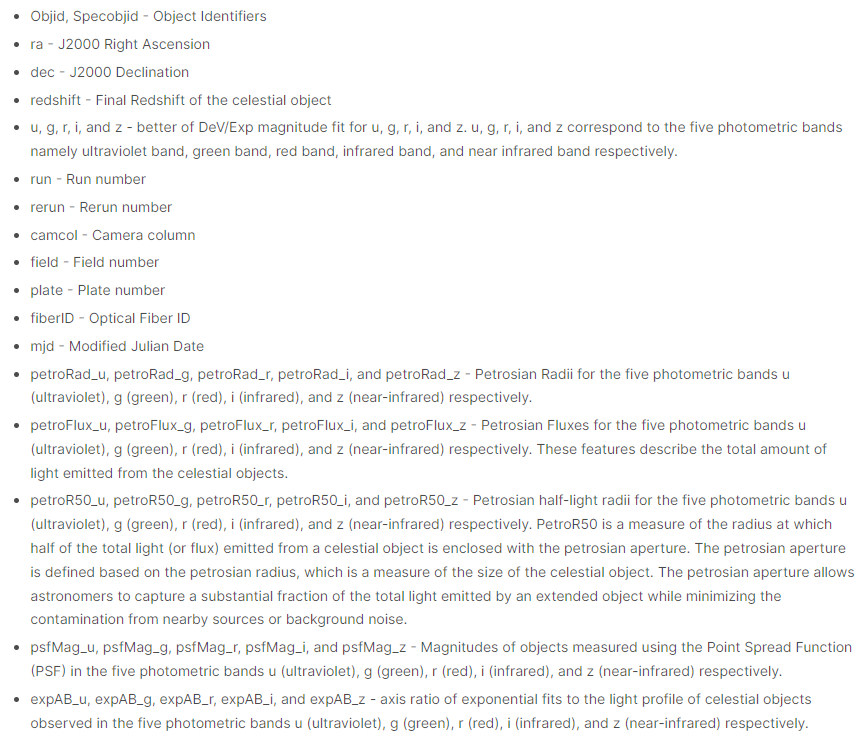

### **1. Source of data:**

 + **Kaggle** using this link: https://www.kaggle.com/datasets/diraf0/sloan-digital-sky-survey-dr18 (The link also provides a detailed description of each Feature used in the dataset which will be refered to as my Data Dictionary)

### **2. Brief description of data:**

 + This dataset consists of 100,000 observations from the Data Release (DR) 18 of the Sloan Digital Sky Survey (SDSS). Each observation is described by 42 features and 1 class column classifying the observation as either a Star, Galaxy or Quasar (Taken from Kaggle).

### **3. What is the target?**

 + Class column that classifies stars, galaxies, and quasars based on their spectral characteristics

### **4. What does one row represent?**(A person? A business? An event? A product?)

 + Each row represents an event (the spectral characteristics of the observation).

### **5. Is this a classification or regression problem?**

 + It is a classification problem.

### **6. How many features does the data have?**

 + There are 42 features.

### **7. How many rows are in the dataset?**

 + There are 100,000 rows.

### **8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?**

 + The data seems to be cleaned. However that are a couple of problems that I might face:

# **⛳ Part 2:**

In [5]:
# General Look at the data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   objid        100000 non-null  float64
 1   specobjid    100000 non-null  float64
 2   ra           100000 non-null  float64
 3   dec          100000 non-null  float64
 4   u            100000 non-null  float64
 5   g            100000 non-null  float64
 6   r            100000 non-null  float64
 7   i            100000 non-null  float64
 8   z            100000 non-null  float64
 9   run          100000 non-null  int64  
 10  rerun        100000 non-null  int64  
 11  camcol       100000 non-null  int64  
 12  field        100000 non-null  int64  
 13  plate        100000 non-null  int64  
 14  mjd          100000 non-null  int64  
 15  fiberid      100000 non-null  int64  
 16  petroRad_u   100000 non-null  float64
 17  petroRad_g   100000 non-null  float64
 18  petroRad_i   100000 non-n

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,301,5,462,288,52000,456,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,301,5,467,289,51990,322,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,301,5,467,288,52000,614,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,301,5,467,2558,54140,414,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,301,5,467,2558,54140,403,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


# **DATA CLEANING** 🤖

###➿ **Let's examine the dimensions of the data**

In [6]:
print(df.shape)
print("Number of rows: "+str(df.shape[0]))
print("Number of columns: "+str(df.shape[1]))

(100000, 43)
Number of rows: 100000
Number of columns: 43


###Given that I am interested in predicting the Class column that classifies stars, galaxies, and quasars based on their spectral characteristics,


###➿ **Let's analyse which features/columns to preserve and which to eliminate**

### In keeping with the Data Dictionary, these columns are to be dropped from the dataset for the below reasons:

+ **objid and specobjid are just identifiers for accessing the rows back when they were stored in the original database. Therefore we will not need them for classification as they are not related to the outcome.**

+ **The features ‘run’, ‘rerun’, ‘camcol’ and ‘field’ are values which describe parts of the camera at the moment when making the observation, e.g. ‘run’ represents the corresponding scan which captured the object.**

+ **The features 'plate' number and 'fiberID' refer to the number of the plate and the ID of the optical fiber responsible for gathering light from the celestial object respectively.**

+ **The feature 'mjd' is represents the number of days that have passed since midnight Nov. 17, 1858 and used in SDSS to keep track of the time of each observation**

In [7]:
column_drop = ['objid', 'specobjid', 'run', 'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid']
df = df.drop(column_drop, axis=1)
print(df.shape)
print("Number of rows: "+str(df.shape[0]))
print("Number of columns: "+str(df.shape[1]))

(100000, 34)
Number of rows: 100000
Number of columns: 34


In [8]:
# Let us examine our new data :)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ra           100000 non-null  float64
 1   dec          100000 non-null  float64
 2   u            100000 non-null  float64
 3   g            100000 non-null  float64
 4   r            100000 non-null  float64
 5   i            100000 non-null  float64
 6   z            100000 non-null  float64
 7   petroRad_u   100000 non-null  float64
 8   petroRad_g   100000 non-null  float64
 9   petroRad_i   100000 non-null  float64
 10  petroRad_r   100000 non-null  float64
 11  petroRad_z   100000 non-null  float64
 12  petroFlux_u  100000 non-null  float64
 13  petroFlux_g  100000 non-null  float64
 14  petroFlux_i  100000 non-null  float64
 15  petroFlux_r  100000 non-null  float64
 16  petroFlux_z  100000 non-null  float64
 17  petroR50_u   100000 non-null  float64
 18  petroR50_g   100000 non-n

,ra,dec,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


###➿ **Let's identify any Class Imbalance**

In [9]:
# This is how distributed my Target variable values are

df['class'].value_counts(normalize=True)

GALAXY    0.52343
STAR      0.37232
QSO       0.10425
Name: class, dtype: float64

# ❌🤔 I will have to deal with my imbalanced classes after the split with SMOTE

###➿ **Let's explore the data**

In [10]:
print('Duplicates:', df.duplicated().sum())

Duplicates: 0


### ✅ We have no duplicate rows to address :)

###➿ **Let's prepare/clean the data for exploratory analysis purposes**

In [11]:
# This code is used to display all my columns with missing values
for col in df.columns:
    print('Column {} has {} missing values'.format(col,df[col].isnull().sum()))

Column ra has 0 missing values
Column dec has 0 missing values
Column u has 0 missing values
Column g has 0 missing values
Column r has 0 missing values
Column i has 0 missing values
Column z has 0 missing values
Column petroRad_u has 0 missing values
Column petroRad_g has 0 missing values
Column petroRad_i has 0 missing values
Column petroRad_r has 0 missing values
Column petroRad_z has 0 missing values
Column petroFlux_u has 0 missing values
Column petroFlux_g has 0 missing values
Column petroFlux_i has 0 missing values
Column petroFlux_r has 0 missing values
Column petroFlux_z has 0 missing values
Column petroR50_u has 0 missing values
Column petroR50_g has 0 missing values
Column petroR50_i has 0 missing values
Column petroR50_r has 0 missing values
Column petroR50_z has 0 missing values
Column psfMag_u has 0 missing values
Column psfMag_r has 0 missing values
Column psfMag_g has 0 missing values
Column psfMag_i has 0 missing values
Column psfMag_z has 0 missing values
Column expAB

### ✅ We have no missing values to address :)

###➿ **Let's ensure data types match the data types listed in the data dictionary**

In [12]:
for col in df.columns:
    print('Column {} type is {}'.format(col,df[col].dtype))

Column ra type is float64
Column dec type is float64
Column u type is float64
Column g type is float64
Column r type is float64
Column i type is float64
Column z type is float64
Column petroRad_u type is float64
Column petroRad_g type is float64
Column petroRad_i type is float64
Column petroRad_r type is float64
Column petroRad_z type is float64
Column petroFlux_u type is float64
Column petroFlux_g type is float64
Column petroFlux_i type is float64
Column petroFlux_r type is float64
Column petroFlux_z type is float64
Column petroR50_u type is float64
Column petroR50_g type is float64
Column petroR50_i type is float64
Column petroR50_r type is float64
Column petroR50_z type is float64
Column psfMag_u type is float64
Column psfMag_r type is float64
Column psfMag_g type is float64
Column psfMag_i type is float64
Column psfMag_z type is float64
Column expAB_u type is float64
Column expAB_g type is float64
Column expAB_r type is float64
Column expAB_i type is float64
Column expAB_z type is 

### ✅ All dtypes are consistent with the data dictinory and make sense :)

###➿ **Let's identify and address any inconsistencies in data for categorical values**

In [13]:
# Let us display our categorical values
df_categorical = df.dtypes == 'object'
df_categorical

ra             False
dec            False
u              False
g              False
r              False
i              False
z              False
petroRad_u     False
petroRad_g     False
petroRad_i     False
petroRad_r     False
petroRad_z     False
petroFlux_u    False
petroFlux_g    False
petroFlux_i    False
petroFlux_r    False
petroFlux_z    False
petroR50_u     False
petroR50_g     False
petroR50_i     False
petroR50_r     False
petroR50_z     False
psfMag_u       False
psfMag_r       False
psfMag_g       False
psfMag_i       False
psfMag_z       False
expAB_u        False
expAB_g        False
expAB_r        False
expAB_i        False
expAB_z        False
redshift       False
class           True
dtype: bool

### ✅ We only have class as our categorcial variables that have already examined on a previous code in which we have not witnessed any inconsistancies to address.

###➿ **Let's identify and address any impossible values**

In [14]:
# Let us display our numeric values of type float (from .info(), we have no int type values)
df_categorical = df.dtypes == 'float'
df_categorical

ra              True
dec             True
u               True
g               True
r               True
i               True
z               True
petroRad_u      True
petroRad_g      True
petroRad_i      True
petroRad_r      True
petroRad_z      True
petroFlux_u     True
petroFlux_g     True
petroFlux_i     True
petroFlux_r     True
petroFlux_z     True
petroR50_u      True
petroR50_g      True
petroR50_i      True
petroR50_r      True
petroR50_z      True
psfMag_u        True
psfMag_r        True
psfMag_g        True
psfMag_i        True
psfMag_z        True
expAB_u         True
expAB_g         True
expAB_r         True
expAB_i         True
expAB_z         True
redshift        True
class          False
dtype: bool

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ra,100000.0,168.856657,83.844216,0.003092,128.879582,168.079889,214.554569,359.996095
dec,100000.0,17.832739,26.344079,-11.252825,-0.537780,2.899490,46.911371,68.731483
u,100000.0,18.641137,0.829035,11.726470,18.214315,18.878005,19.275750,19.599990
g,100000.0,17.407088,0.974683,11.696170,16.853340,17.520310,18.052460,19.977270
r,100000.0,16.878550,1.118858,11.277090,16.194763,16.896065,17.565593,31.698160
i,100000.0,16.517137,31.694636,-9999.000000,15.861995,16.594740,17.310102,30.980870
z,100000.0,16.154837,54.871034,-9999.000000,15.620268,16.419040,17.193873,28.668700
petroRad_u,100000.0,6.497004,13.134345,0.031018,1.580248,3.473864,7.470103,258.518600
petroRad_g,100000.0,4.678636,5.080707,0.072805,1.483575,3.336594,6.570969,258.409800
petroRad_i,100000.0,4.458623,5.189891,0.057369,1.301338,3.349003,6.196268,258.453600


### ✅ Having examined, mainly the min and max values for each float-type-value, to the data dictionary's meaning plus a small research on the internet, all values seem to be in conformity with what is expected.

## 💡 In a nutshell, having addressed unneeded features to help predict my Target Variable, the data has 10000 observations with 34 variables. All variables have numeric data except class. The class variable has character data type. And there is no missing datas in our data. Among them, almost around 50 percent (52343) rows are classified as galaxies, 37232 rows are classified as stars and only 10425 rows as quasars.

# **⛳ Part 3:**

# **EDA** 🤖

In [16]:
df.columns.values

array(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'petroRad_u', 'petroRad_g',
       'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r',
       'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i',
       'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z',
       'redshift', 'class'], dtype=object)

In [17]:
columns = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'petroRad_u', 'petroRad_g',
       'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r',
       'petroR50_z', 'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i',
       'psfMag_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z',
       'redshift', 'class']

In [18]:
# I need to replace my Target variable into a numeric column so as to be displayed in the Heatmap to detect correclations with the features

df['class'].replace({'GALAXY': 0,
                     'STAR': 1,
                     'QSO': 2,},inplace=True)

df['class'].value_counts(normalize=True)

0    0.52343
1    0.37232
2    0.10425
Name: class, dtype: float64

## Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap

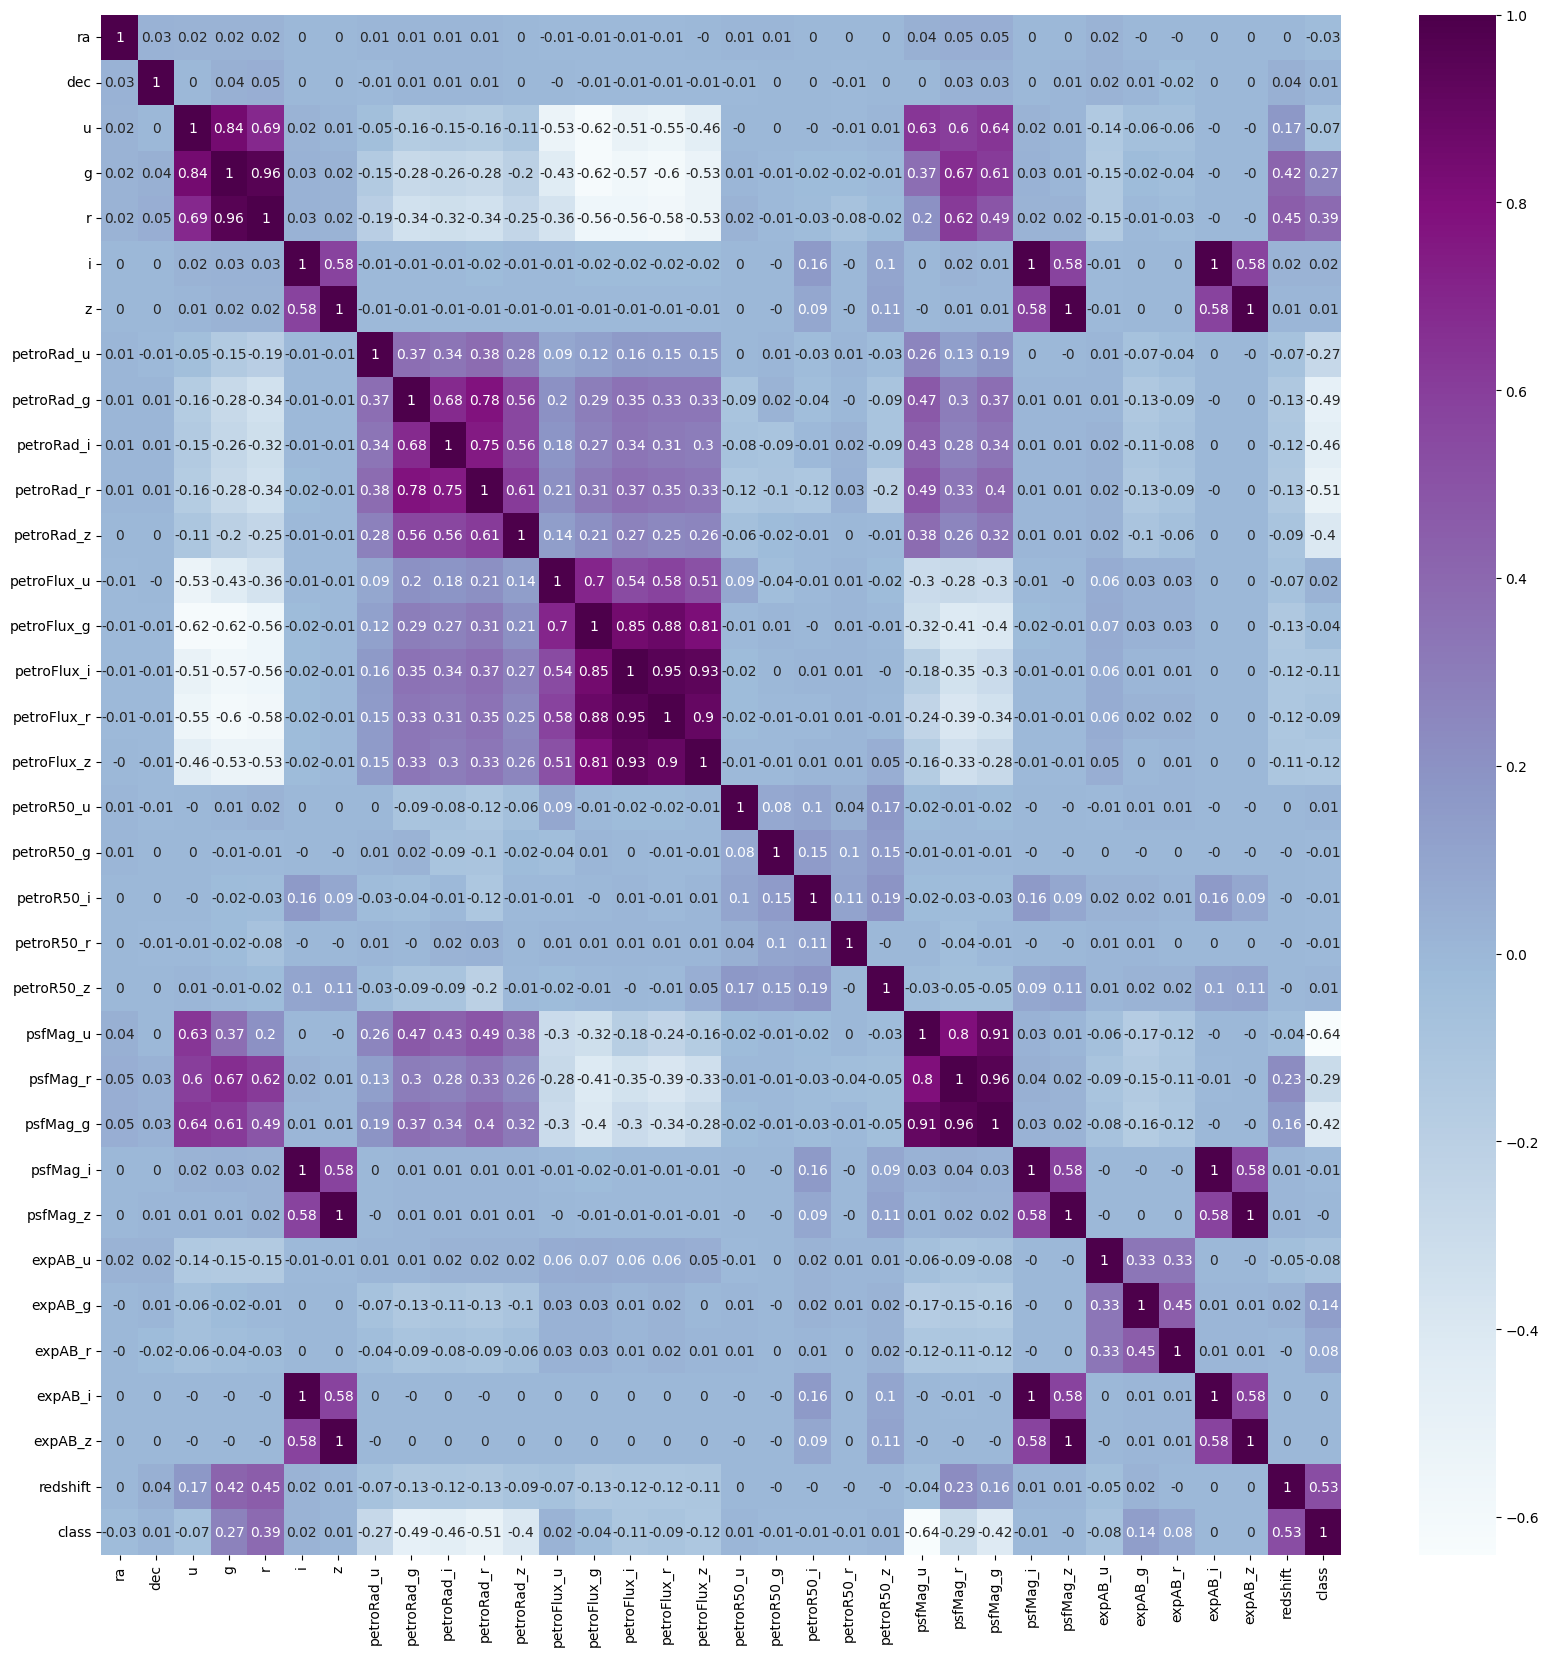

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().round(2),cmap='BuPu', annot=True);

## 🤔 Given that the Heatmap is hard to read to the big number of features, the following code is to help us display all features which correlation coefficient is >= 0.8 (that is a very strongly correlated to one another)

In [20]:
def Very_strong_correlation(df, treshold=0.8):
    cm = df.corr().round(2) #correlation matrix
    np.fill_diagonal(cm.values, 0) # set diagonal to 0
    corr = [(cm.index[x], cm.columns[y], cm.iloc[x,y]) for x, y in zip(*np.where(abs(np.tril(cm)) > treshold))] # create couple (feature1, feature2, value)
    for couple in corr:
        feature1, feature2, value = couple
        print(f'{feature1} and {feature2} are strongly correlated (value = {value})')

    return corr   # cm

In [21]:
Very_strong_correlation(df, treshold=0.7)

g and u are strongly correlated (value = 0.84)
r and g are strongly correlated (value = 0.96)
petroRad_r and petroRad_g are strongly correlated (value = 0.78)
petroRad_r and petroRad_i are strongly correlated (value = 0.75)
petroFlux_i and petroFlux_g are strongly correlated (value = 0.85)
petroFlux_r and petroFlux_g are strongly correlated (value = 0.88)
petroFlux_r and petroFlux_i are strongly correlated (value = 0.95)
petroFlux_z and petroFlux_g are strongly correlated (value = 0.81)
petroFlux_z and petroFlux_i are strongly correlated (value = 0.93)
petroFlux_z and petroFlux_r are strongly correlated (value = 0.9)
psfMag_r and psfMag_u are strongly correlated (value = 0.8)
psfMag_g and psfMag_u are strongly correlated (value = 0.91)
psfMag_g and psfMag_r are strongly correlated (value = 0.96)
psfMag_i and i are strongly correlated (value = 1.0)
psfMag_z and z are strongly correlated (value = 1.0)
expAB_i and i are strongly correlated (value = 1.0)
expAB_i and psfMag_i are strongly c

[('g', 'u', 0.84),
 ('r', 'g', 0.96),
 ('petroRad_r', 'petroRad_g', 0.78),
 ('petroRad_r', 'petroRad_i', 0.75),
 ('petroFlux_i', 'petroFlux_g', 0.85),
 ('petroFlux_r', 'petroFlux_g', 0.88),
 ('petroFlux_r', 'petroFlux_i', 0.95),
 ('petroFlux_z', 'petroFlux_g', 0.81),
 ('petroFlux_z', 'petroFlux_i', 0.93),
 ('petroFlux_z', 'petroFlux_r', 0.9),
 ('psfMag_r', 'psfMag_u', 0.8),
 ('psfMag_g', 'psfMag_u', 0.91),
 ('psfMag_g', 'psfMag_r', 0.96),
 ('psfMag_i', 'i', 1.0),
 ('psfMag_z', 'z', 1.0),
 ('expAB_i', 'i', 1.0),
 ('expAB_i', 'psfMag_i', 1.0),
 ('expAB_z', 'z', 1.0),
 ('expAB_z', 'psfMag_z', 1.0)]

## 💡 Using a correlation heatmap, one can deduce the following:

### 1. Feature-Feature correlations: There are several highly correlated features (a threshold of 0.7):

+ g and u are strongly correlated (value = 0.84)

+ r and g are strongly correlated (value = 0.96)

+ petroRad_r and petroRad_g are strongly correlated (value = 0.78)

+ petroRad_r and petroRad_i are strongly correlated (value = 0.75)

+ petroFlux_i and petroFlux_g are strongly correlated (value = 0.85)

+ petroFlux_r and petroFlux_g are strongly correlated (value = 0.88)

+ petroFlux_r and petroFlux_i are strongly correlated (value = 0.95)

+ petroFlux_z and petroFlux_g are strongly correlated (value = 0.81)

+ petroFlux_z and petroFlux_i are strongly correlated (value = 0.93)

+ petroFlux_z and petroFlux_r are strongly correlated (value = 0.9)

+ psfMag_r and psfMag_u are strongly correlated (value = 0.8)

+ psfMag_g and psfMag_u are strongly correlated (value = 0.91)

+ psfMag_g and psfMag_r are strongly correlated (value = 0.96)

+ psfMag_i and i are strongly correlated (value = 1.0)

+ psfMag_z and z are strongly correlated (value = 1.0)

+ expAB_i and i are strongly correlated (value = 1.0)

+ expAB_i and psfMag_i are strongly correlated (value = 1.0)

+ expAB_z and z are strongly correlated (value = 1.0)

+ expAB_z and psfMag_z are strongly correlated (value = 1.0)

Although highly correlated features, I judged it important to leave them since they all affect, as per the data dictionary and a small search on the internet, in distinguishing the celestial object.

### 2. Feature-Target correlations: Both Redshift and our target veriable 'class' are modertly correlated with a correlation coefficient of 0.53. This is an expected result since Astronomers use redshift to measure approximate distances to very distant galaxies. The more distant a celestial object, the more it will be redshifted.

## ➿ **Let us explore this visible Redshift (Feature) and Class (Target) relationship.**

In [22]:
# To better display my classes in the lineplot, I will convert my target variable values into its original values

df['class'].replace({0: 'GALAXY',
                     1: 'STAR',
                     2: 'QSO',},inplace=True)
df['class'].dtype

dtype('O')

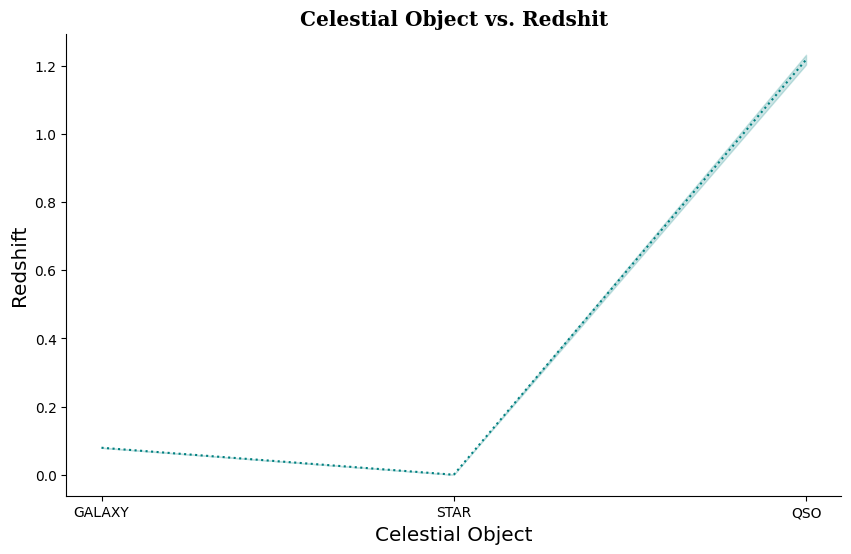

In [23]:
# Lineplot of Redshift and our target variable class

fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(data=df, x="class", y="redshift", sizes=4, linestyle='dotted', color='teal');
plt.xlabel("Celestial Object",fontsize='x-large')
plt.ylabel("Redshift",fontsize='x-large')
plt.title("Celestial Object vs. Redshit", fontfamily='serif', fontsize='x-large', fontweight='semibold')
sns.despine()
plt.show();

In [24]:
# To better display my classes relationship with the features in distplots, I will convert my target variable values into numeric values (this is to avoid this ValueError: could not convert string to float: 'GALAXY')

df['class'].replace({'GALAXY': 0,
                     'STAR': 1,
                     'QSO': 2},inplace=True)
df['class'].dtype

dtype('int64')

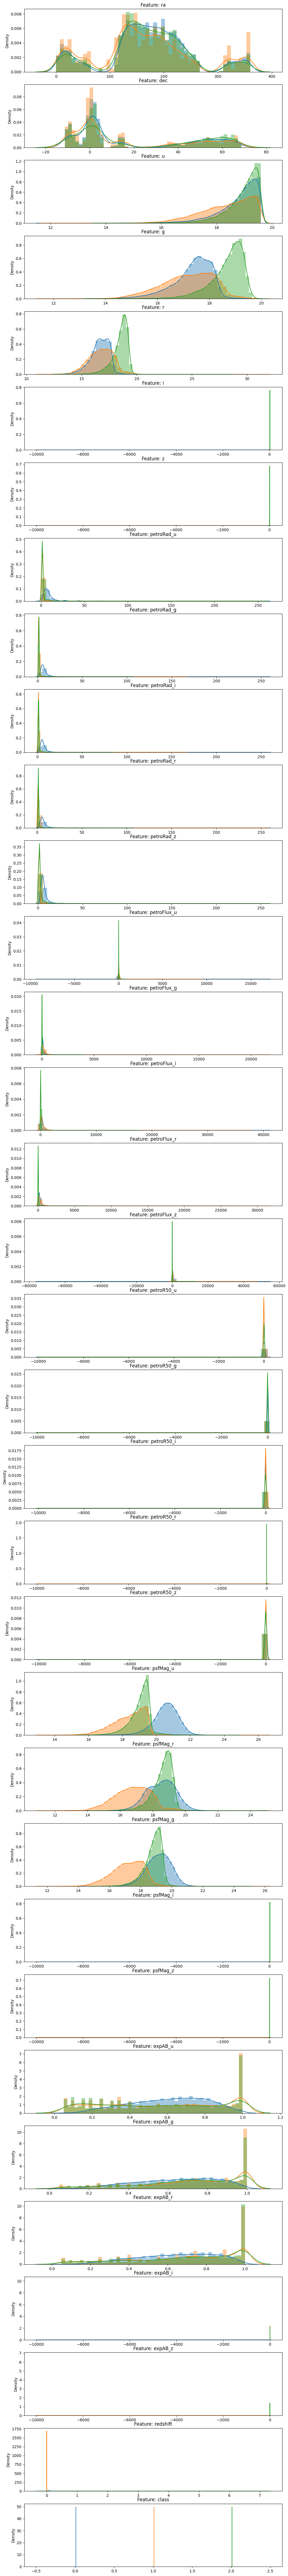

In [25]:
plt.figure(figsize=(12,30*4))
import matplotlib.gridspec as gridspec
features = df.iloc[:,0:34].columns
gs = gridspec.GridSpec(34, 1)
for i, feature in enumerate(df[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feature][df['class'] == 0], bins=50)
    sns.distplot(df[feature][df['class'] == 1], bins=50)
    sns.distplot(df[feature][df['class'] == 2], bins=50)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(feature))
plt.show()

## 🤔💡 **Given that my dataset is all numeric and relationships cannot be easily diplayed for a regular person to understand, I have judged it important to integrate a Polar chart with Plotly Express to showcase the Top most Important Features.**

## 👍 I am going to scale my df, under df_scaled, so that my values fit within a specific scale, from 0 to 1 in this case.

In [26]:
df_scaled = df.drop(columns=['class'])
df_y = df['class']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

## 👍 I am going to use a model, Radom Forst Classifier in this case, to built my polar chart.

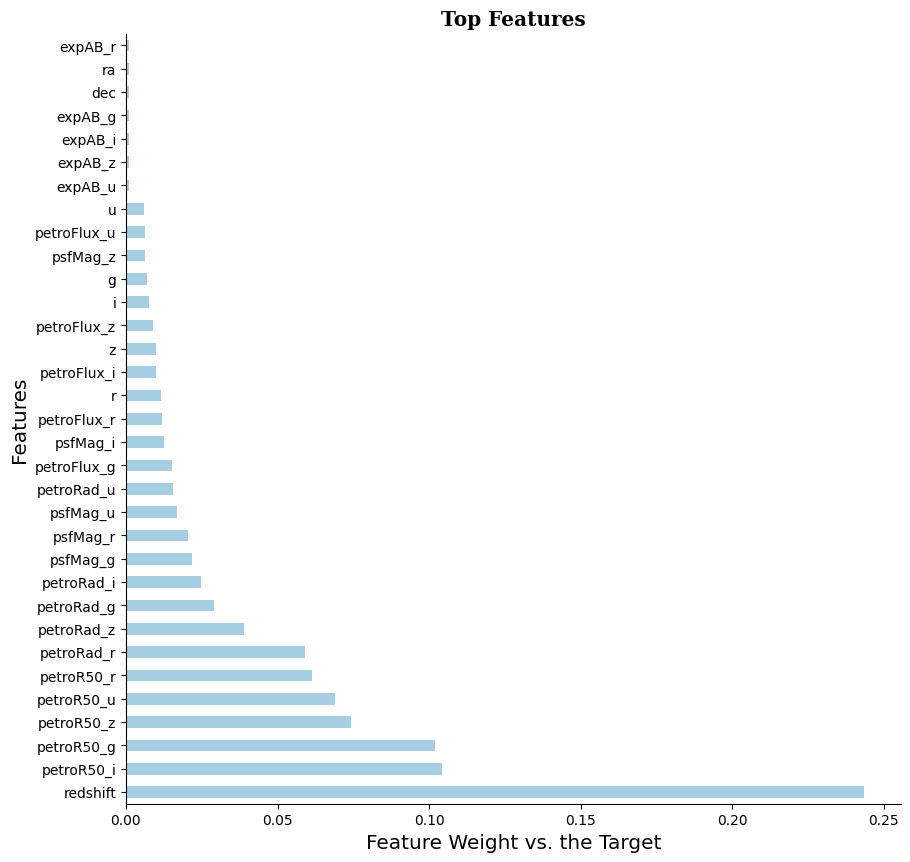

redshift       0.243429
petroR50_i     0.104205
petroR50_g     0.102028
petroR50_z     0.074123
petroR50_u     0.068976
petroR50_r     0.061305
petroRad_r     0.059059
petroRad_z     0.039005
petroRad_g     0.029082
petroRad_i     0.024723
psfMag_g       0.021918
psfMag_r       0.020419
psfMag_u       0.016816
petroRad_u     0.015414
petroFlux_g    0.015360
psfMag_i       0.012534
petroFlux_r    0.011822
r              0.011445
petroFlux_i    0.009916
z              0.009830
petroFlux_z    0.008806
i              0.007545
g              0.006908
psfMag_z       0.006412
petroFlux_u    0.006169
u              0.005846
expAB_u        0.001084
expAB_z        0.001018
expAB_i        0.000988
expAB_g        0.000988
dec            0.000960
ra             0.000941
expAB_r        0.000927
dtype: float64


In [27]:
# I will be using Random Forest Classifier as a model to extract my Top 15 most Important Features

fig, ax = plt.subplots(figsize = (10,10))
feat_importance = pd.Series(RandomForestClassifier(random_state = 42).fit(df_scaled, df_y).feature_importances_, index = df_scaled.columns)   # I have sued random_state = 42 so that the results are fix for they will be transported to the next code for use
feat_importance.nlargest(33).plot(kind = 'barh', stacked=True, colormap='Paired')
plt.xlabel("Feature Weight vs. the Target",fontsize='x-large')
plt.ylabel("Features",fontsize='x-large')
plt.title('Top Features', fontfamily='serif', fontsize='x-large', fontweight='semibold')
sns.despine()
plt.show()
print(feat_importance.nlargest(33))

In [28]:
# I need to think of a way to make this graph displays the value the previous code runs (they change with every run!)

import plotly.graph_objects as go

fig = go.Figure(go.Scatterpolar(
    r=[0.243429, 0.104205, 0.102028, 0.074123, 0.068976, 0.061305, 0.059059, 0.039005, 0.029082, 0.024723, 0.021918, 0.020419, 0.016816, 0.015414, 0.015360],
    theta=['redshift', 'petroR50_i', 'petroR50_g', 'petroR50_z', 'petroR50_u', 'petroR50_r', 'petroRad_r', 'petroRad_z', 'petroRad_g', 'petroRad_i', 'psfMag_g', 'psfMag_r', 'psfMag_u', 'petroRad_u', 'petroFlux_g']))


fig.update_traces(fill='toself')
fig.update_layout(polar = dict(
    radialaxis_angle = -45,
    angularaxis = dict(
        direction = 'clockwise',
        period = 6)))


fig.update_layout({'title': {'text': 'Top 15 most Important Features','x': 0.5,'xanchor': 'center','yanchor': 'top','font': {'size': 20},}})

fig.show()

# **⛳ Part 4:**

# **MODELING** 🤖

### We have already identified class imbalance with: 52343 rows (52.343%) classified as galaxies, 37232 rows (37.232%) are classified as stars and only 10425 rows (10.425%) as quasars.

### 💡 This will be addressed using SMOTE.

### 😎 For the sake of demonstrating the effects of Both SMOTE, Model Tuning, as well as PCA, I will be creating the default models then apply each of these steps.

In [29]:
#Check class balance
df['class'].value_counts(normalize=True)

0    0.52343
1    0.37232
2    0.10425
Name: class, dtype: float64

In [30]:
#Train test split
X = df.drop(columns=['class'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [31]:
display(X.head())
display(y.head())

,ra,dec,u,g,r,i,z,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
0,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691
1,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814
2,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069
3,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087
4,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018


0    0
1    1
2    0
3    1
4    1
Name: class, dtype: int64

## **💡 Dimensionality Reduction through PCA**

### In order to avoid "Curse of Dimensionality" in which my 33 features might have my ML algorithms struggle to "find" patterns, fall into overfitting, and slow down training and prediction-time, I will be applying PCA to my model.

In [32]:
# Scaling my Data First
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Instantiate PCA, to capture 99% of variances
pca = PCA(n_components=0.99)

# Fit PCA
xtrain_comp = pca.fit_transform(X_train)
xtest_comp = pca.transform(X_test)

# Convert into a dataframe
pca_xtest = pd.DataFrame(data = xtest_comp)
pca_xtrain = pd.DataFrame(data = xtrain_comp)
pca_xtrain

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22
98980,-1.838861,0.848864,-0.012408,-0.503120,0.264505,-0.159365,0.502511,-1.363543,-0.367096,0.303417,-0.648392,0.349334,0.201047,-0.287785,0.226044,0.022289,0.195599,0.149204,0.076654,0.158279,0.115793,0.116469,0.053211
69824,-0.229265,-0.024955,-0.000567,1.546042,-0.610889,-0.301472,-0.038270,-0.601364,2.352353,-0.776422,-0.175979,0.132117,0.190622,-0.009941,-0.104187,-0.437734,-0.149598,-0.104083,-0.149616,0.592393,0.262497,0.137564,0.020072
9928,0.546275,-2.257446,-0.018794,2.115155,-0.362355,0.082747,0.625462,-1.300846,-0.996897,0.510972,-0.650759,0.311176,0.132678,-0.245028,-0.469353,-0.126722,0.190008,-0.556979,0.193985,0.030354,0.248509,0.380531,0.112362
75599,-1.431121,1.292829,-0.031432,1.293287,-0.022415,-0.164900,-0.160015,0.451090,0.254511,0.010159,0.001766,0.202379,-0.474371,-0.042962,-0.457247,0.491092,0.042996,-0.058296,-0.051203,-0.256634,-0.319110,-0.239204,-0.074223
95621,1.802759,3.463334,-0.009702,-0.528601,-1.036229,-0.163908,-0.122614,0.140335,0.070873,0.027008,0.574158,-0.266577,-0.631663,0.402326,0.172193,0.033510,-0.026725,-0.073551,-0.478361,-0.136231,-0.300761,-0.142601,-0.047620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,-0.910332,-1.391181,0.018970,-1.241523,-0.067473,0.038975,-0.241502,0.711176,0.278205,-0.195269,-0.349783,0.307476,0.290479,-0.334455,0.111180,0.161330,-0.689102,-1.641313,-0.066015,0.082112,0.280205,0.303899,0.159667
54886,0.812116,1.581979,-0.029863,0.491337,-0.640803,-0.060809,0.595574,-1.940025,-0.194122,0.329714,0.251359,-0.116277,-0.810983,0.328076,-0.175804,0.280670,0.184539,0.042681,-0.095793,-0.338584,-0.470725,-0.564915,-0.193294
76820,-3.560189,-0.920037,-0.052416,1.556167,2.958610,0.109546,-0.733460,1.939647,-1.214968,-0.274620,0.918631,-0.884034,0.169016,0.909216,-0.004551,-1.228809,0.410664,0.660482,-0.360040,0.466940,0.154633,0.032765,0.074506
860,0.068615,1.884846,0.002188,-0.091040,-0.841020,-0.150188,-0.163040,0.241990,0.427077,-0.140831,0.317563,-0.129617,-0.350075,0.265477,-0.077879,-0.066054,-0.168834,-0.015497,-0.344056,0.067831,-0.115717,-0.037312,-0.012633


### **💡 Addressing class imbalance using SMOTE**

### We have already identified class imbalance with: 50 percent (52343) rows classified as galaxies, 37232 rows are classified as stars and only 10425 rows as quasars.

In [34]:
# Define a function that takes in arguments and prints out a classification report, confusion matrix and ROC AUC

def evaluate_classification(model, pca_xtest, y_test, cmap='Blues',
                            normalize='true', classes=None, figsize=(20, 5)):
  test_preds = model.predict(pca_xtest)
  print(classification_report(y_test, test_preds, target_names=classes))

  fig, ax = plt.subplots(ncols=3, figsize=figsize)
  ConfusionMatrixDisplay.from_estimator(model, pca_xtest, y_test, cmap=cmap,
                                        display_labels=classes,
                                        ax=ax[0])

  ConfusionMatrixDisplay.from_estimator(model, pca_xtest, y_test, cmap=cmap,
                                        display_labels=classes, normalize='true',
                                        ax=ax[1])

  y_pred = model.predict_proba(pca_xtest)
  # Create a new figure and axis
  # fig, ax = plt.subplots(1)
  # Iterate over the labels the classifier has seen
  for i, label in enumerate(model.classes_):
    RocCurveDisplay.from_predictions(y_test, y_pred[:,i], pos_label=label, ax=ax[2], name=f'class {label}')
  # ax.plt([0, 1], [0, 1], ls='--', label='Baseline (AUC = 0.5)')

# 🥉 **Modeling using k-nearest neighbors (KNN) Algorithm**

In [35]:
%%time

# Creat-e model pipeline with scaler, SMOTE, and model
smote = SMOTE()
KNN = KNeighborsClassifier()

Knn_smote_pipe = make_sampler_pipeline(scaler, smote, KNN)

# Fit the model pipeline
Knn_smote_pipe.fit(pca_xtrain, y_train)

# Show my before-tuning hyperparameters
print(f'- What is the number of neighbors used: {KNN.n_neighbors}' '\n')
print(f'- What is the power parameter for the Minkowski metric used: {KNN.p}' '\n')
print(f'- What is the weight used: {KNN.weights}' '\n')

- What is the number of neighbors used: 5

- What is the power parameter for the Minkowski metric used: 2

- What is the weight used: uniform

CPU times: user 5.23 s, sys: 26.5 ms, total: 5.25 s
Wall time: 3.67 s


              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12989
           1       0.98      0.99      0.98      9385
           2       0.88      0.94      0.91      2626

    accuracy                           0.97     25000
   macro avg       0.95      0.96      0.96     25000
weighted avg       0.97      0.97      0.97     25000



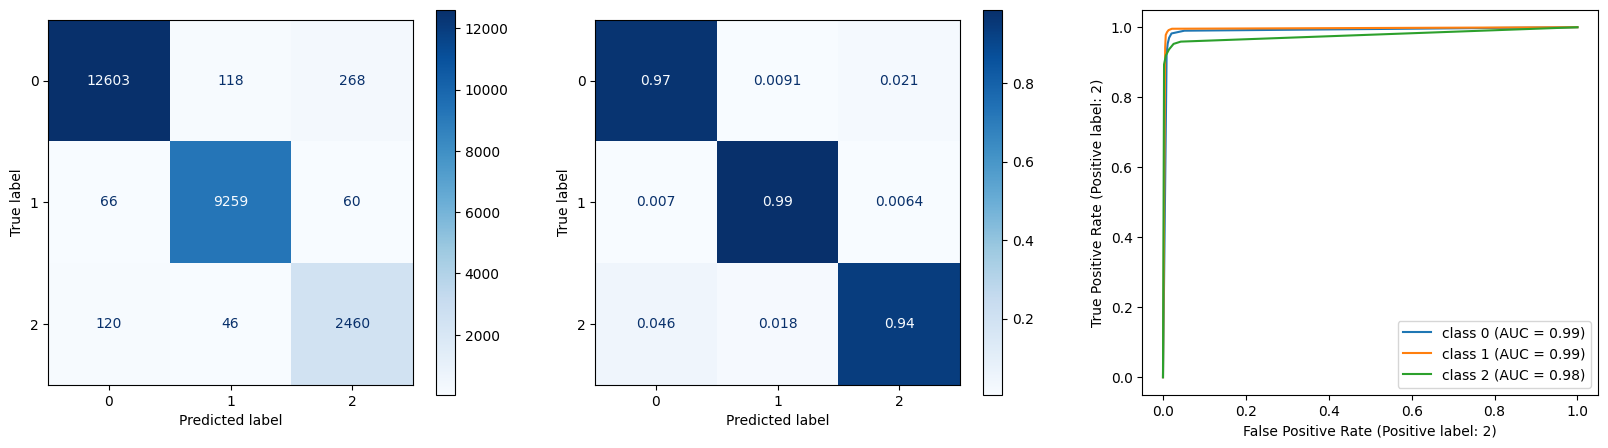

In [36]:
evaluate_classification(Knn_smote_pipe, pca_xtest, y_test)

## 💪 **Tunning my KNN models' hyperparameters using GridseachCV**

In [71]:
# KNN = KNeighborsClassifier()   # This is the model I am to tune, This is an important code but I have already called for it on a previous occasion :)
KNN_pipe = make_pipeline(scaler, KNN)   # Why not this: Knn_smote_pipe = make_sampler_pipeline(scaler, smote, KNN)
KNN_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [ ]:
# Because the fitting of GridseachCV on pca_xtrain and y_train has taken too long, I judge it better to leave it as a comment with the results already displayed in the output
%%time

param_grid_K = {'kneighborsclassifier__n_neighbors': [5, 6, 7, 8, 9, 10],
                'kneighborsclassifier__p': [1, 3, 4, 5],
                'kneighborsclassifier__weights': ['distance','uniform']}
KNNT_pipe_gs = GridSearchCV(KNN_pipe, param_grid_K)
KNNT_pipe_gs.fit(pca_xtrain, y_train)
KNNT_pipe_gs.best_params_

# These are the results from GridsearchCV ==> To save time during Run all, this block of code is put as a comment :)



# 🥈 **Modeling using my Tunned k-nearest neighbors (KNN) Algorithm**


In [ ]:
%%time

# Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
knn = KNeighborsClassifier(n_neighbors= 9, p = 1, weights = 'uniform')

Knn_smote_pipeT = make_sampler_pipeline(scaler, smote, KNN)

# Fit the model pipeline
Knn_smote_pipeT.fit(pca_xtrain, y_train)

CPU times: user 8.28 s, sys: 24.4 ms, total: 8.31 s
Wall time: 5.98 s


Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('kneighborsclassifier', KNeighborsClassifier())])

              precision    recall  f1-score   support

      GALAXY       0.99      0.97      0.98     12989
         QSO       0.88      0.94      0.91      2626
        STAR       0.98      0.99      0.99      9385

    accuracy                           0.97     25000
   macro avg       0.95      0.97      0.96     25000
weighted avg       0.97      0.97      0.97     25000



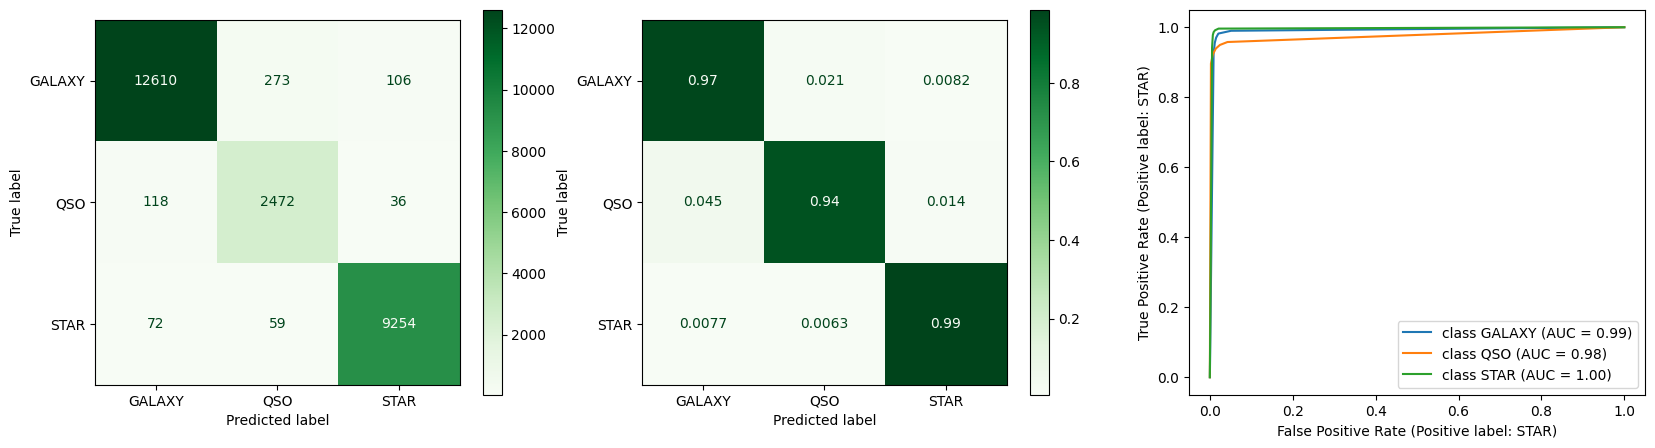

In [ ]:
evaluate_classification(Knn_smote_pipeT, pca_xtest, y_test, cmap='Greens')

# 🥉 **Modeling using Random Forest Classifier Algorithm**

In [37]:
%%time
# Create model pipeline with scaler, SMOTE, and model
# smote = SMOTE() --> This is an important code but I have already called for it on a previous occasion :)
R_F = RandomForestClassifier(random_state = 42)

RF_smote_pipe = make_sampler_pipeline(scaler, smote, R_F)

# Fit the model pipeline
RF_smote_pipe.fit(pca_xtrain, y_train)

# Show my before-tuning hyperparameters
print(f'- What is maximum depth of the random forest tree: {max([estimator.get_depth() for estimator in R_F.estimators_])}' '\n')
print(f'- What is the number of trees in the forest? {R_F.n_estimators}' '\n')
print(f'- What is the minimum number of samples required to be at a leaf node? {R_F.min_samples_leaf}' '\n')
print(f'- What is the min samples split of the forest? {R_F.min_samples_split}' '\n')

- What is maximum depth of the random forest tree: 42

- What is the number of trees in the forest? 100

- What is the minimum number of samples required to be at a leaf node? 1

- What is the min samples split of the forest? 2

CPU times: user 1min 17s, sys: 86.6 ms, total: 1min 17s
Wall time: 1min 18s


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12989
           1       0.99      0.99      0.99      9385
           2       0.97      0.94      0.96      2626

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.98     25000
weighted avg       0.98      0.98      0.98     25000



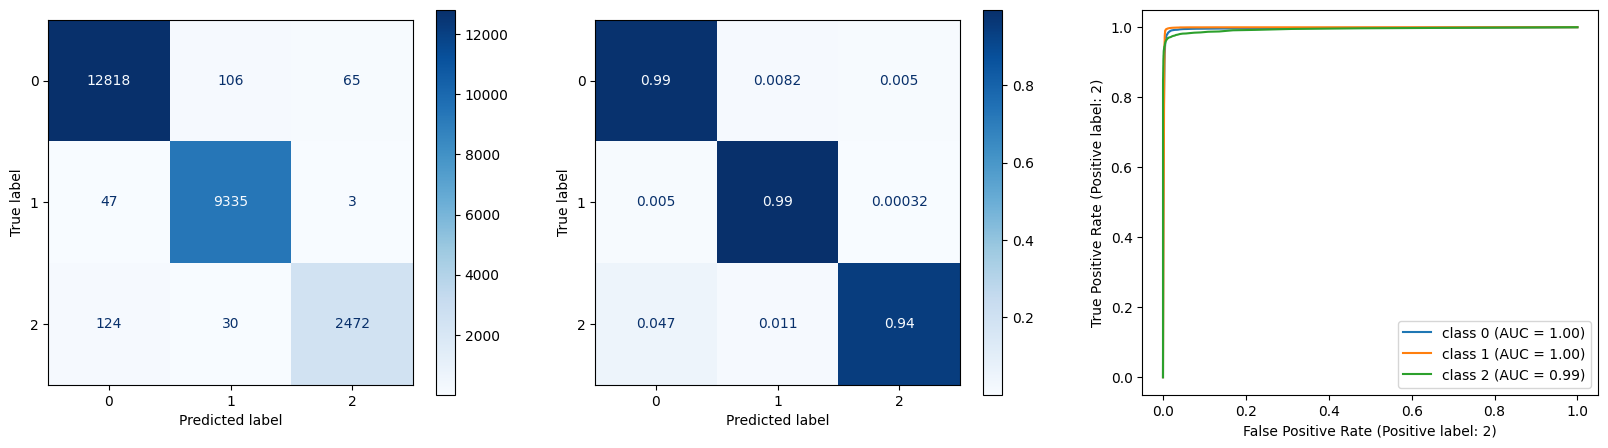

In [38]:
evaluate_classification(RF_smote_pipe, pca_xtest, y_test)

## 💪 **Tunning my Random Forest Classifier models' hyperparameters using GridseachCV**

In [67]:
# R_F = RandomForestClassifier(random_state = 42)   # This is the model I am to tune, This is an important code but I have already called for it on a previous occasion :)
RF_pipe = make_pipeline(scaler, R_F)   # Why not this: RF_smote_pipe = make_sampler_pipeline(scaler, smote, R_F)
RF_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestclassifier', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestclassifier': RandomForestClassifier(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomfore

In [68]:
# Because the fitting of GridseachCV on pca_xtrain and y_train has taken too long, I judge it better to leave it as a comment with the results already displayed in the output

"""%%time

param_grid_RFT = {'randomforestclassifier__max_depth': [5, 10, 15],
                'randomforestclassifier__n_estimators' : [50, 100, 150],
                'randomforestclassifier__min_samples_leaf': [2, 3],
                'randomforestclassifier__min_samples_split': [3, 7, 10]}
RF_pipe_gs = GridSearchCV(RF_pipe, param_grid_RFT)
RF_pipe_gs.fit(pca_xtrain, y_train)
RF_pipe_gs.best_params_"""

# These are the results from GridsearchCV ==> To save time during Run all, this block of code is put as a comment :)

"""CPU times: user 1h 34min 30s, sys: 2.16 s, total: 1h 34min 32s
Wall time: 1h 34min 48s
{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__min_samples_split': 3,
 'randomforestclassifier__n_estimators': 100}"""

CPU times: user 1h 34min 30s, sys: 2.16 s, total: 1h 34min 32s
Wall time: 1h 34min 48s


{'randomforestclassifier__max_depth': 15,
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__min_samples_split': 3,
 'randomforestclassifier__n_estimators': 100}

# 🥈 **Modeling using my Tunned Random Forest Classifier Algorithm**

In [69]:
%%time

#Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
R_F_smote = RandomForestClassifier(max_depth = 15, n_estimators = 100, min_samples_leaf = 2, min_samples_split = 3, random_state = 42)

R_F_smote_pipeT = make_sampler_pipeline(scaler, smote, R_F_smote)
#Fit and evaluate the model pipeline
R_F_smote_pipeT.fit(pca_xtrain, y_train)

CPU times: user 1min 5s, sys: 61.5 ms, total: 1min 5s
Wall time: 1min 2s


Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=15, min_samples_leaf=2,
                                        min_samples_split=3,
                                        random_state=42))])

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12989
           1       0.99      0.99      0.99      9385
           2       0.97      0.94      0.96      2626

    accuracy                           0.98     25000
   macro avg       0.98      0.97      0.98     25000
weighted avg       0.98      0.98      0.98     25000



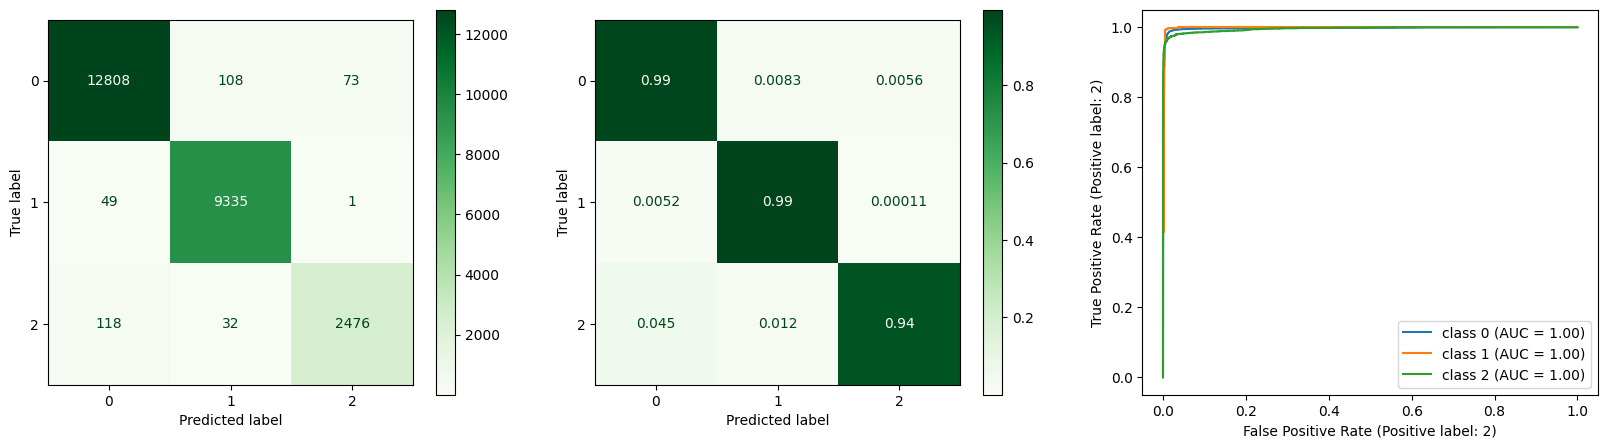

In [70]:
evaluate_classification(R_F_smote_pipeT, pca_xtest, y_test, cmap='Greens')

# 🥉 **Modeling using Logistic Regression Algorithm**

In [39]:
%%time
# Create model pipeline with scaler, SMOTE, and model
# smote = SMOTE() --> This is an important code but I have already called for it on a previous occasion :)
log_Reg = LogisticRegression(max_iter=1000)

LR_smote_pipe = make_sampler_pipeline(scaler, smote, log_Reg)

# Fit the model pipeline
LR_smote_pipe.fit(pca_xtrain, y_train)

# Show my before-tuning hyperparameters
print(f'- What is the number of neighbors used: {log_Reg.C}' '\n')
print(f'- What is the solver used: {log_Reg.solver}' '\n')
print(f'- What is the penalty used: {log_Reg.penalty}' '\n')

- What is the number of neighbors used: 1.0

- What is the solver used: lbfgs

- What is the penalty used: l2

CPU times: user 11.1 s, sys: 2.38 s, total: 13.5 s
Wall time: 7.64 s


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12989
           1       0.99      1.00      0.99      9385
           2       0.96      0.96      0.96      2626

    accuracy                           0.99     25000
   macro avg       0.98      0.98      0.98     25000
weighted avg       0.99      0.99      0.99     25000



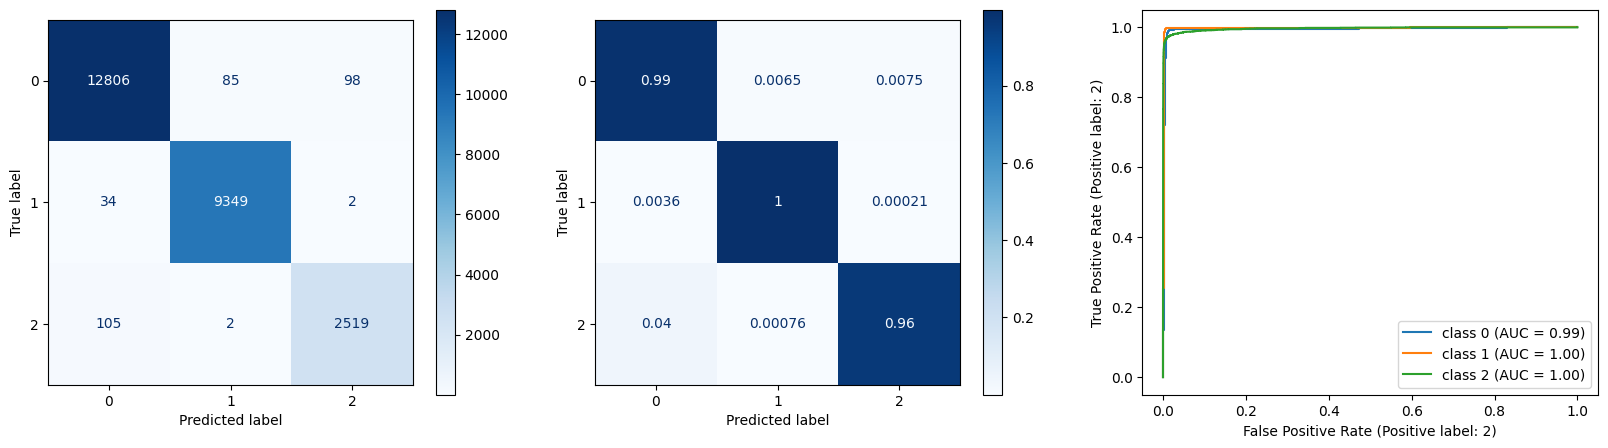

In [40]:
evaluate_classification(LR_smote_pipe, pca_xtest, y_test)

## 💪 **Tunning my Logistic Regression models' hyperparameters using GridseachCV**

In [62]:
# log_Reg = LogisticRegression(max_iter=1000)   # This is the model I am to tune, This is an important code but I have already called for it on a previous occasion :)
LG_pipe = make_pipeline(scaler, log_Reg)   # Why not this: LR_smote_pipe = make_sampler_pipeline(scaler, smote, log_Reg)
LG_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression(max_iter=1000))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(max_iter=1000),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 1000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': None,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

In [63]:
"""%%time

param_grid_LRT = {'logisticregression__C': [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
                'logisticregression__penalty': ['l1', 'l2'],
                'logisticregression__solver':['lbfgs', 'liblinear'],}
LG_pipe_gs = GridSearchCV(LG_pipe, param_grid_LRT)
LG_pipe_gs.fit(pca_xtrain, y_train)
LG_pipe_gs.best_params_"""

# These are the results from GridsearchCV ==> To save time during Run all, this block of code is put as a comment :)

"""CPU times: user 18min 25s, sys: 1min 7s, total: 19min 33s
Wall time: 17min 56s
{'logisticregression__C': 10,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}"""

CPU times: user 18min 25s, sys: 1min 7s, total: 19min 33s
Wall time: 17min 56s


{'logisticregression__C': 10,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'liblinear'}

# 🥈 **Modeling using my Tunned Logistic Regression Algorithm**

In [66]:
%%time

#Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
log_reg_smote = LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear', max_iter=1000)
log_reg_smote_pipeT = make_sampler_pipeline(scaler, smote, log_reg_smote)
#Fit and evaluate the model pipeline
log_reg_smote_pipeT.fit(pca_xtrain, y_train)

CPU times: user 1min 43s, sys: 222 ms, total: 1min 43s
Wall time: 2min 9s


Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('logisticregression',
                 LogisticRegression(C=10, max_iter=1000, penalty='l1',
                                    solver='liblinear'))])

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     12989
           1       0.99      1.00      0.99      9385
           2       0.96      0.96      0.96      2626

    accuracy                           0.99     25000
   macro avg       0.98      0.98      0.98     25000
weighted avg       0.99      0.99      0.99     25000



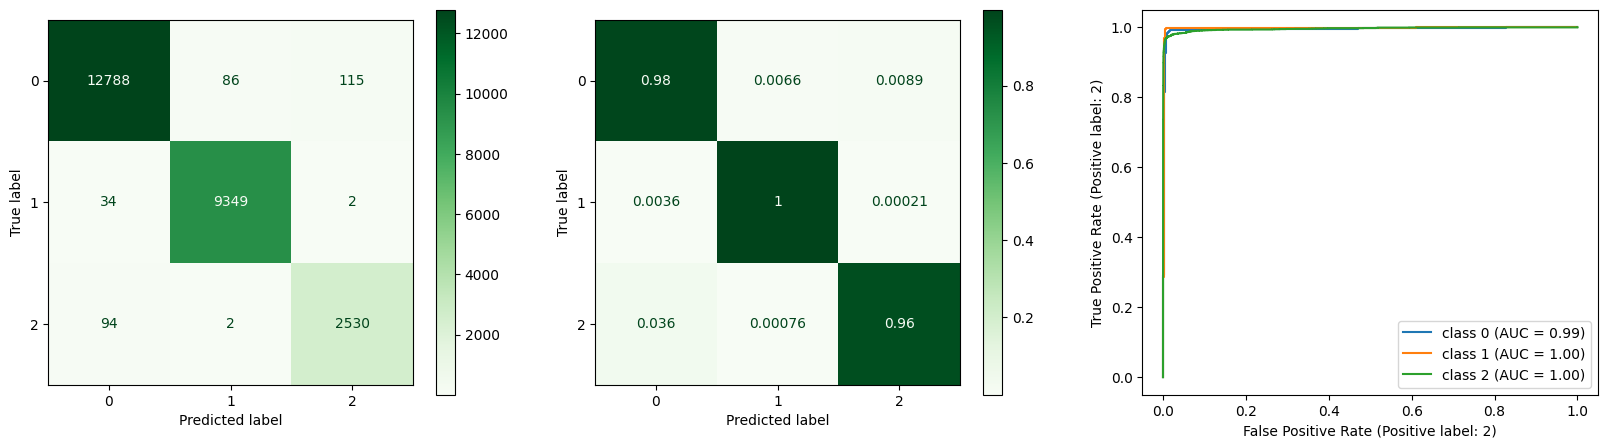

In [65]:
evaluate_classification(log_reg_smote_pipeT, pca_xtest, y_test, cmap='Greens')

# 🥉 **Modeling using XGBoost Algorithm**

In [41]:
%%time

#Create model pipeline with scaler, SMOTE, and model
smote = SMOTE()
xgb_smote = LogisticRegression(max_iter=1000)
xgb_smote_pipe = make_sampler_pipeline(scaler, smote, xgb_smote)
#Fit and evaluate the model pipeline
xgb_smote_pipe.fit(pca_xtrain, y_train)

CPU times: user 11.9 s, sys: 2.58 s, total: 14.5 s
Wall time: 8.95 s


Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12989
           1       0.99      1.00      0.99      9385
           2       0.96      0.96      0.96      2626

    accuracy                           0.99     25000
   macro avg       0.98      0.98      0.98     25000
weighted avg       0.99      0.99      0.99     25000



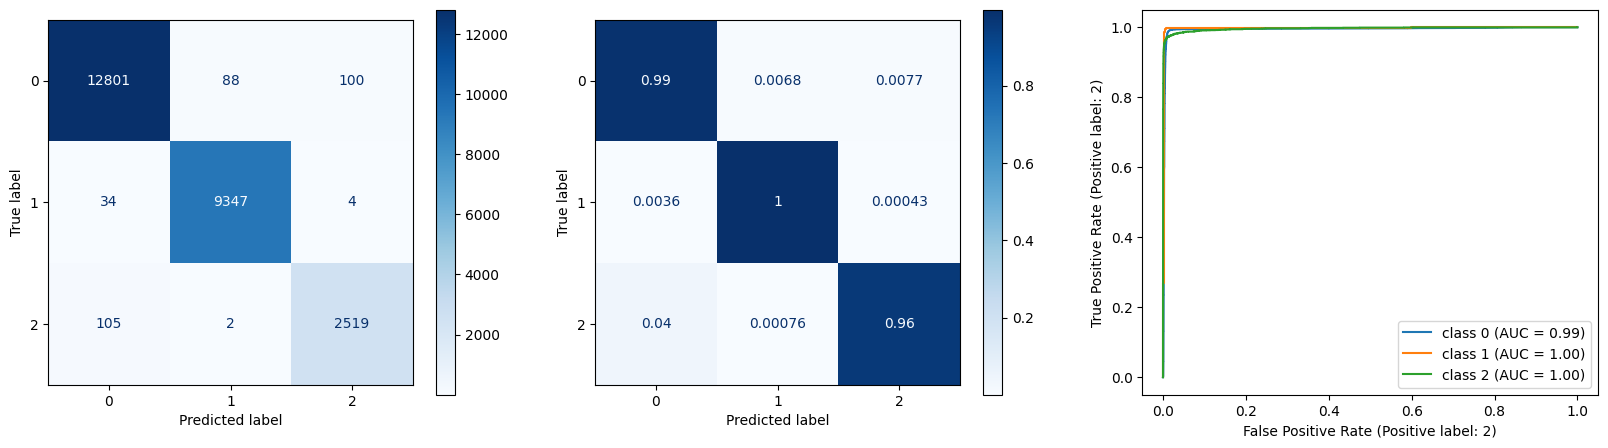

In [42]:
evaluate_classification(xgb_smote_pipe, pca_xtest, y_test)

# ✨ **Deep Learning using the Sequential model**

In [43]:
# Learning history plotting function
def plot_history(history):
  """Takes a keras model learning history and plots each metric"""

  metrics = history.history.keys()

  for metric in metrics:
      if not 'val' in metric:
        plt.plot(history.history[f'{metric}'], label=f'{metric}')
        if f'val_{metric}' in metrics:
          plt.plot(history.history[f'val_{metric}'], label=f'val_{metric}')
        plt.legend()
        plt.title(f'{metric}')
        plt.show()

In [44]:
# encode labels
encoder = LabelEncoder()

encoder.fit(y_train)
y_train_enc = encoder.transform(y_train)
y_test_enc = encoder.transform(y_test)

# make a record of the classes, in order of the encoding, in case we want to
# translate predictions into fish names later.
classes = encoder.classes_

# binarize labels
binarizer = LabelBinarizer()

binarizer.fit(y_train_enc)
y_train_bin = binarizer.transform(y_train_enc)
y_test_bin = binarizer.transform(y_test_enc)

# check results
print('Original Target')
print(y_train.head())

print('\nEncoded Target')
print(y_train_enc[:5])

print('\nBinarized Target')
print(y_train_bin[:5])

Original Target
98980    0
69824    0
9928     1
75599    0
95621    0
Name: class, dtype: int64

Encoded Target
[0 0 1 0 0]

Binarized Target
[[1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]]


In [45]:
# create model architecture

# define some parameters
input_dim = pca_xtrain.shape[1]
num_classes = len(classes)

# instantiate the base model
DL_model = Sequential()

# add layers
DL_model.add(Dense(30, input_dim=input_dim, activation='relu'))
DL_model.add(Dense(20, activation='relu'))
DL_model.add(Dense(num_classes, activation='softmax'))
DL_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                720       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 1403 (5.48 KB)
Trainable params: 1403 (5.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [46]:
# compile model with categorical_crossentropy

DL_model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy',
                             metrics.Precision(),
                             metrics.Recall()])

In [47]:
%%time

# fit model

history = DL_model.fit(pca_xtrain, y_train_bin,
                          validation_data=(pca_xtest, y_test_bin),
                          epochs=150,
                          verbose=0)

CPU times: user 8min 45s, sys: 30.1 s, total: 9min 15s
Wall time: 8min 23s


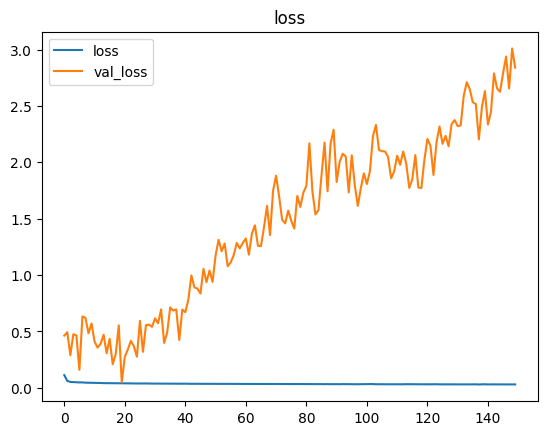

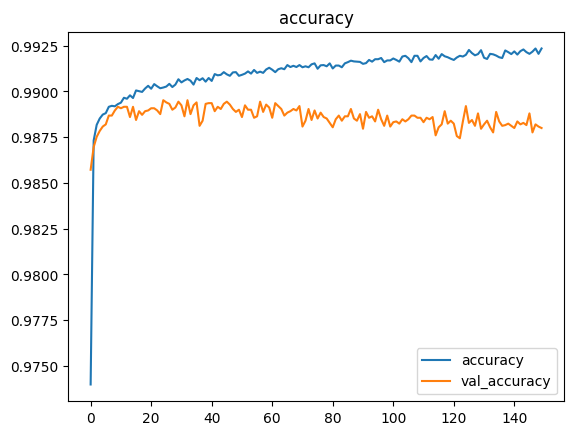

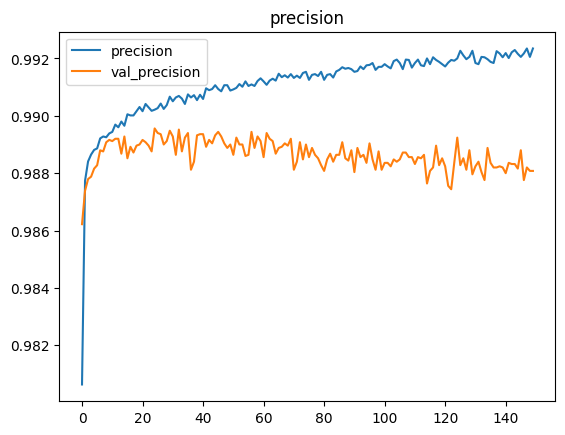

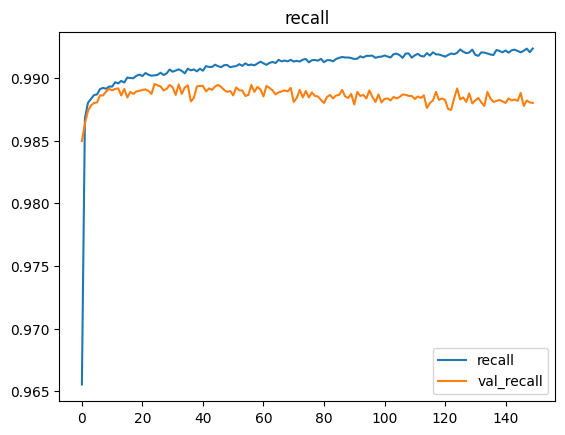

In [48]:
plot_history(history)

In [49]:
# get raw predictions
raw_pred = DL_model.predict(pca_xtest)

# display predictions and binarized true labels
print('Raw Predictions\n', raw_pred[:5])
print('\nbinarized y_test\n', y_test_bin[:5])

782/782 [==============================] - 1s 888us/step
Raw Predictions
 [[9.7560734e-01 1.1570385e-15 2.4392713e-02]
 [9.3308169e-01 8.2468815e-12 6.6918336e-02]
 [9.9988192e-01 2.2998144e-08 1.1804576e-04]
 [3.6428692e-03 9.9635679e-01 3.2005954e-07]
 [2.1272139e-03 9.9785602e-01 1.6616268e-05]]

binarized y_test
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]]


In [50]:
# convert predictions and labels into integers representing each fish class.
y_pred = np.argmax(raw_pred, axis=1)
y_true = np.argmax(y_test_bin, axis=1)

print('integer predictions', y_pred)
print('integer true labels', y_true)

integer predictions [0 0 0 ... 0 0 0]
integer true labels [0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12989
           1       0.99      1.00      0.99      9385
           2       0.98      0.95      0.96      2626

    accuracy                           0.99     25000
   macro avg       0.99      0.98      0.98     25000
weighted avg       0.99      0.99      0.99     25000



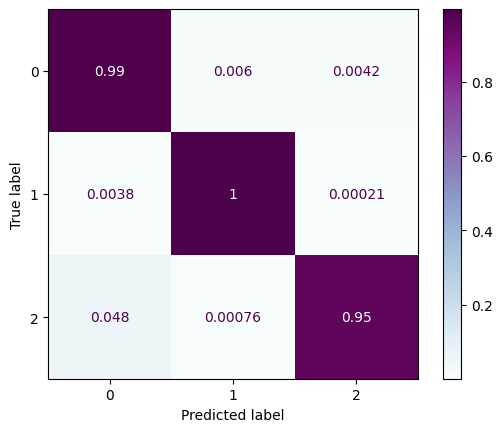

In [51]:
# print classification report and confusion matrix

print(classification_report(y_true, y_pred))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                        display_labels=classes,
                                        normalize='true',
                                        cmap='BuPu');

## 💪 **Tunning my Deep Learning using the Sequential model**

### To tune my Deep Learning using the Sequential model, I will be using Dropout and Early Stopping as my regularization technique.

In [53]:
# create model architecture

# define some parameters
input_dim = pca_xtrain.shape[1]
num_classes = len(classes)

# instantiate the base model
DL_modelT = Sequential()

# add layers
DL_modelT.add(Dense(30, input_dim=input_dim, activation='relu'))
DL_modelT.add(Dropout(.5))
DL_modelT.add(Dense(20, activation='relu'))
DL_modelT.add(Dropout(.5))
DL_modelT.add(Dense(num_classes, activation='softmax'))
DL_modelT.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                720       
                                                                 
 dropout_2 (Dropout)         (None, 30)                0         
                                                                 
 dense_7 (Dense)             (None, 20)                620       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 63        
                                                                 
Total params: 1403 (5.48 KB)
Trainable params: 1403 (5.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
# compile model with categorical_crossentropy

DL_modelT.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy',
                             metrics.Precision(),
                             metrics.Recall()])

early_stopping = EarlyStopping(patience = 5)

In [57]:
%%time

# fit model

history = DL_modelT.fit(pca_xtrain, y_train_bin,
                          validation_data=(pca_xtest, y_test_bin),
                          epochs=150,
                          verbose=0)

CPU times: user 9min 9s, sys: 27.4 s, total: 9min 37s
Wall time: 8min 44s


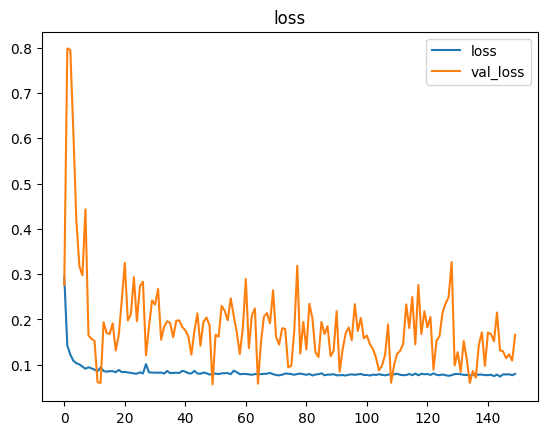

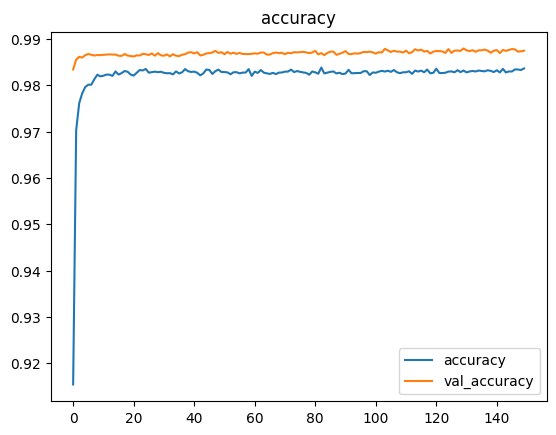

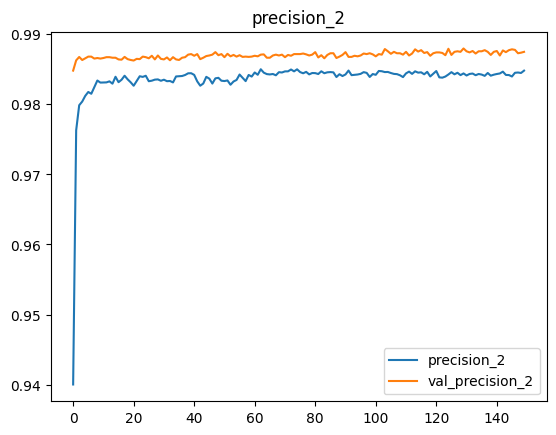

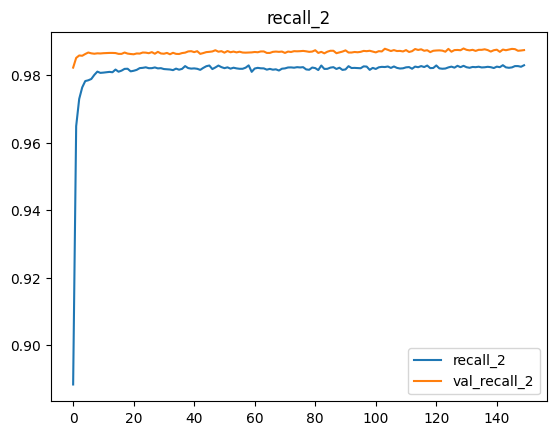

In [58]:
plot_history(history)

In [59]:
# get raw predictions
raw_pred = DL_modelT.predict(pca_xtest)

# display predictions and binarized true labels
print('Raw Predictions\n', raw_pred[:5])
print('\nbinarized y_test\n', y_test_bin[:5])

782/782 [==============================] - 1s 834us/step
Raw Predictions
 [[9.7750455e-01 1.5093090e-06 2.2493958e-02]
 [9.8312521e-01 5.1275824e-06 1.6869705e-02]
 [9.9823093e-01 5.8728397e-06 1.7632261e-03]
 [3.5715580e-04 9.9964279e-01 9.9630779e-16]
 [1.2663769e-03 9.9873364e-01 5.1525164e-12]]

binarized y_test
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]]


In [60]:
# convert predictions and labels into integers representing each fish class.
y_pred = np.argmax(raw_pred, axis=1)
y_true = np.argmax(y_test_bin, axis=1)

print('integer predictions', y_pred)
print('integer true labels', y_true)

integer predictions [0 0 0 ... 0 0 0]
integer true labels [0 0 0 ... 0 0 0]


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12989
           1       0.99      1.00      0.99      9385
           2       0.98      0.94      0.96      2626

    accuracy                           0.99     25000
   macro avg       0.99      0.98      0.98     25000
weighted avg       0.99      0.99      0.99     25000



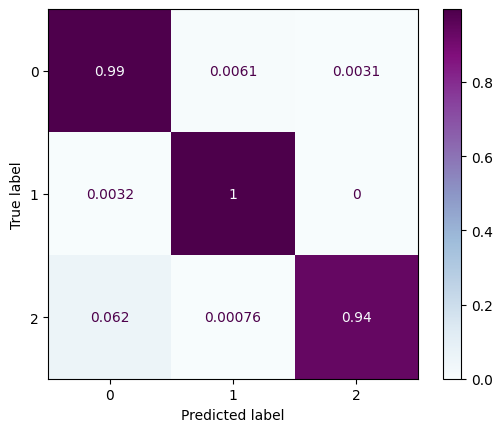

In [61]:
# print classification report and confusion matrix

print(classification_report(y_true, y_pred))
ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                                        display_labels=classes,
                                        normalize='true',
                                        cmap='BuPu');